In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
def predict(hypothesis, theta, X):
    return hypothesis(theta, X)

In [4]:
def hypothesis(theta, X):
    '''
    Returns a vertical vector of shape (m,1)
    Here theta is a vertical vector of shape (n+1,1) and X is a matrix of shape (m, n+1)
    (m, n+1) @ (n+1,1) -> (m,1)
    '''
    return X@theta

In [5]:
def cost(hypothesis, theta, X, y):
    '''
    Returns a single number that is the cost.
    Here theta is a vertical vector of shape (n+1,1), X is a matrix of shape (m, n+1) and y is a vertical vector of (m,1)
    '''
    m = len(y)
    diff = hypothesis(theta, X) - y
    J = np.sum(diff.T @ diff)/(2*m) #vectorised calculation
    return J

In [6]:
def gradient(hypothesis, theta, X, y):
    '''
    Returns a vertical vector of (n+1,1) which represents the gradient of the cost function.
    Here theta is a vertical vector of shape (n+1,1), X is a matrix of shape (m, n+1) and y is a vertical vector of (m,1)
    '''
    m = len(y)
    grad = (X.T @ (hypothesis(theta, X) - y))/m
    return grad

In [7]:
def update_coeff(gradient, hypothesis, theta, X, y, learning_rate):
    J_prev = 1
    J = 0
    iteration = 0

    while abs(J_prev - J) > 0:
        J_prev = J
        J = cost(hypothesis, theta, X, y)
        theta = theta - learning_rate * gradient(hypothesis, theta, X, y)
        print('Cost for iteration {}: {}'.format(iteration, J))
        iteration += 1

    return theta

In [8]:
def prep(df):
    dat = np.matrix(df)
    X = dat[:,:-1]
    y = dat[:,-1]

    m, n = np.shape(X)

    ones = np.matrix(np.ones(m)).T
    X = np.concatenate([ones,X], axis = 1)
    theta = np.matrix(np.zeros(n+1)).T
    return theta, X, y

In [9]:
number_of_examples = 200
points = np.matrix([np.array([i for i in range(number_of_examples)]), np.array([0.4*i+3+50*np.random.normal(0,1) for i in range(number_of_examples)])]).T
df = pd.DataFrame(points, columns = ['X', 'y'])

In [10]:
df

,X,y
0,0.0,10.841444
1,1.0,-74.112882
2,2.0,-30.496505
3,3.0,73.718081
4,4.0,6.479844
...,...,...
195,195.0,118.781196
196,196.0,104.112413
197,197.0,6.310845
198,198.0,12.771264


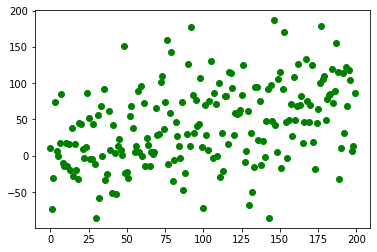

In [11]:
plt.plot(df['X'],df['y'], 'go')

## Train Test split

In [12]:
def train_test_split(X, y, test_size = 0.2):
    df = np.matrix(df)
    m = len(df)
    test_lim = int(test_size*m)
    X_test, X_train, y_test, y_train = X[:test_lim,0], X[test_lim:,0], y[:test_lim:,1], y[test_lim:,1]
    return X_train, X_test, y_train, y_test

In [21]:
theta, X, y = prep(df)

In [20]:
theta = update_coeff(gradient, hypothesis, theta, X, y, learning_rate = 0.0001)

Cost for iteration 0: 2393.9551911559606
Cost for iteration 1: 170021.1301755811
Cost for iteration 2: 25259924.9991181
Cost for iteration 3: 3780637136.4403605
Cost for iteration 4: 565873583901.0143
Cost for iteration 5: 84698162569367.7
Cost for iteration 6: 1.2677352261285022e+16
Cost for iteration 7: 1.8975058665228275e+18
Cost for iteration 8: 2.840126581072017e+20
Cost for iteration 9: 4.2510113611892715e+22
Cost for iteration 10: 6.362778938584931e+24
Cost for iteration 11: 9.523605650861835e+26
Cost for iteration 12: 1.4254630793962294e+29
Cost for iteration 13: 2.1335879132478566e+31
Cost for iteration 14: 3.193486698712306e+33
Cost for iteration 15: 4.7799095746319474e+35
Cost for iteration 16: 7.154417004733681e+37
Cost for iteration 17: 1.0708504392902412e+40
Cost for iteration 18: 1.6028149639158303e+42
Cost for iteration 19: 2.3990425873619172e+44
Cost for iteration 20: 3.590810833157661e+46
Cost for iteration 21: 5.374611733633736e+48
Cost for iteration 22: 8.0445483289